In [27]:
from pathlib import Path
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [40]:
pd.set_option('display.max_rows', 500)

In [15]:
video_files = list(Path("test_videos").glob("*.mp4"))

In [18]:
test_video = video_files[0]
output_dir = os.path.join("video_frame_samples", test_video.name.split(".")[0])

In [34]:
    video_files[0]

WindowsPath('test_videos/test_video_0.mp4')

In [19]:
img_files = list(Path(output_dir).glob("*.jpg"))
len(img_files)

3468

In [28]:
img_file_dict = {int(file.name.replace("kang","").split(".")[0]): cv2.imread(str(file), cv2.IMREAD_GRAYSCALE) 
                 for file in img_files}

total_pixals = img_file_dict[0].shape[0] * img_file_dict[0].shape[1]
img_keys = sorted(img_file_dict)

In [80]:
diff_dict = {}
for index in range(len(img_keys)-1):
    diff_pixal = np.sum(img_file_dict[img_keys[index+1]] != img_file_dict[img_keys[index]])
    diff_percent = np.round(diff_pixal/total_pixals,3)
    diff_dict[img_keys[index]] = {'diff_pixal':diff_pixal, 'diff_percent':diff_percent}

In [81]:
diff_df = pd.DataFrame.from_dict(diff_dict, orient='index').reset_index()

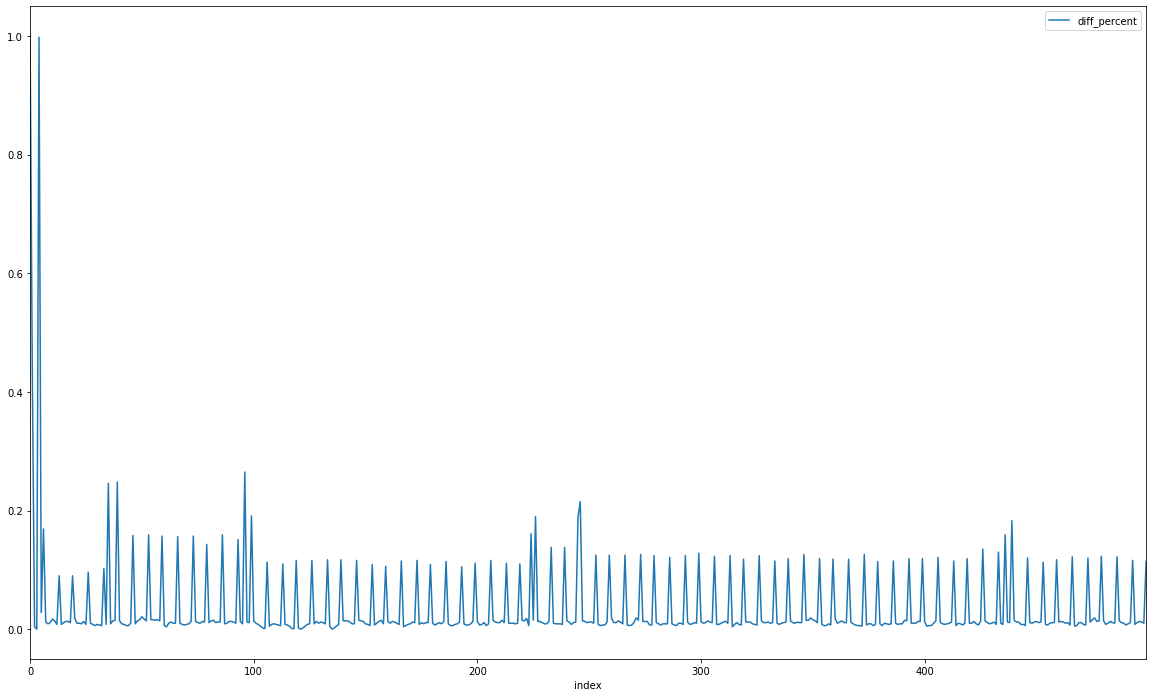

In [82]:
diff_df.head(500).plot(x='index', y='diff_percent',figsize=(20,12))
plt.show()

In [75]:
#np.sum(img_file_dict[55] != img_file_dict[54])

In [86]:
np.mean(img_file_dict[54] == img_file_dict[53])

0.8406608072916667

In [119]:
np.mean(np.abs(img_file_dict[39] - img_file_dict[40]))

33.90977213541667

In [130]:
np.mean(np.abs(img_file_dict[40] != img_file_dict[39]))

0.247763671875

In [131]:
np.mean(np.abs(img_file_dict[39] != img_file_dict[38]))

0.014729817708333334

In [ ]:
np.mean(img_file_dict[54] == img_file_dict[53])

In [85]:
diff_df.query("diff_percent >= 0.15")

,index,diff_pixal,diff_percent
0,0,921283,1.000
1,1,398077,0.432
4,4,919543,0.998
6,6,156145,0.169
35,35,226945,0.246
39,39,228339,0.248
46,46,145568,0.158
53,53,146847,0.159
59,59,144716,0.157
66,66,144083,0.156


### ocr

In [97]:
import os 
import sys

from paddleocr import PaddleOCR,draw_ocr

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [99]:
ocr = PaddleOCR(rec_model_dir="../PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/",
               det_model_dir="../PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/",
                rec_char_dict_path="../PaddleOCR-release-2.1/ppocr/utils/en_dict.txt"
               )

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\alistar/.paddleocr/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='../PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='../PaddleOCR-release-2.1/ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='../PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)


In [114]:
ocr = PaddleOCR(rec_model_dir="../PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/",
               det_model_dir="../PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/",
                rec_char_dict_path="../PaddleOCR-release-2.1/ppocr/utils/en_dict.txt"
               ) # The model file will be downloaded automatically when executed for the first time


Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\alistar/.paddleocr/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='../PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='../PaddleOCR-release-2.1/ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='../PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)


In [132]:
ocr = PaddleOCR(rec_model_dir="C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/",
               det_model_dir="C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/",
                rec_char_dict_path="C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ppocr/utils/en_dict.txt"
               )

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\alistar/.paddleocr/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=

In [133]:
index = 39

In [140]:
def img_resize(img, scale: int=60):
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [138]:
result = ocr.ocr(img_file_dict[index])

[2022/05/24 07:23:05] root INFO: dt_boxes num : 38, elapse : 0.2896454334259033
[2022/05/24 07:23:06] root INFO: rec_res num  : 38, elapse : 0.5167760848999023


In [139]:
result2 = ocr.ocr(img_file_dict[index+1])

[2022/05/24 07:23:07] root INFO: dt_boxes num : 38, elapse : 0.2852358818054199
[2022/05/24 07:23:08] root INFO: rec_res num  : 38, elapse : 0.5106329917907715


In [143]:
result = ocr.ocr(img_resize(img_file_dict[index]))

[2022/05/24 07:25:10] root INFO: dt_boxes num : 26, elapse : 0.19801735877990723
[2022/05/24 07:25:10] root INFO: rec_res num  : 26, elapse : 0.4190356731414795


In [144]:
result2 = ocr.ocr(img_resize(img_file_dict[index+1]))

[2022/05/24 07:25:11] root INFO: dt_boxes num : 26, elapse : 0.2109684944152832
[2022/05/24 07:25:11] root INFO: rec_res num  : 26, elapse : 0.4172086715698242


In [149]:
def img_dissimilarity(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [151]:
img_dissimilarity(img_file_dict[index], img_file_dict[index+1])

33.90977213541667

In [160]:
np.savetxt("img1.csv", img_file_dict[index], delimiter=",")
np.savetxt("img2.csv", img_file_dict[index+1], delimiter=",")

In [153]:
img_dissimilarity(img_resize(img_file_dict[index]), img_resize(img_file_dict[index+1]))

31.60793125482253

In [168]:
pd.Series(img_file_dict[index+1].flatten()).value_counts(1).head(10)

163    0.409016
255    0.251632
251    0.043601
254    0.017789
247    0.016609
252    0.010150
253    0.009793
164    0.009555
250    0.006028
249    0.004592
dtype: float64

In [167]:
pd.Series(img_file_dict[index].flatten()).value_counts(1).head(10)

163    0.408862
255    0.241994
251    0.040812
254    0.022827
247    0.012875
253    0.012336
252    0.009414
164    0.008839
250    0.008615
162    0.005562
dtype: float64

In [171]:
pd.Series(img_file_dict[97].flatten()).value_counts(1).head(10)

163    0.409883
255    0.346508
254    0.024768
253    0.013740
164    0.008519
252    0.006842
251    0.004752
162    0.004141
116    0.003768
115    0.003753
dtype: float64

In [145]:
for line in result:
    if line[-1][-1] > 0.9:
        print(line[-1])

('Jean-FrancoisPugetisCPMP', 0.99778587)
('lkaggle', 0.92994595)
('CPM', 0.9923014)
('llkaggle', 0.9204383)
('days', 0.98020494)
('LVMH', 0.99154365)
('Christian Dior', 0.9452208)
('SEPHORA', 0.98394483)
('kaggle', 0.97617894)
('KAGGLE DAYS PARIS. JAN25-26TH.2019', 0.9660669)


In [146]:
for line in result2:
    if line[-1][-1] > 0.9:
        print(line[-1])

('Jean-FrancoisPugetisCPMP', 0.9975272)
('lkaggle', 0.9348219)
('CPM', 0.9896013)
('llkaggle', 0.9181275)
('23', 0.9019962)
('06', 0.9025269)
('days', 0.9806904)
('LVMH', 0.99168354)
('Christian Dior', 0.97973454)
('SEPHORA', 0.9804992)
('kaggle', 0.964278)
('KAGGLE DAYS PARIS. JAN25-26TH.2019', 0.96394616)
